In [ ]:
Will be used a machine learning, data generating is now in a python file. 

In [2]:
#standard modukles
import numpy as np
import random as random
import time
import pandas as pd
#using simpleguitk for display, is not needed for computer game
#likely not needed un this notebook 
import simpleguitk as simplegui
#foor plotting 
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
#for efficient saving and loading
import pickle
#skyjp game classes and functions
from skyjo_functions4 import *
#own functions for machine learning
from ml_functions2 import *
#for machine learning
from xgboost import XGBRegressor

In [3]:
names=['alpha','beta']
nature=['computer','computer']
levels=[0,0]
scores,turns,last_player,numeric=skyjo_round(names,nature,levels,0,True,True,True) 
print(numeric.shape)
#selected rows array
sel1=np.zeros((51))
#print the row to see whether it is what it should be 
#open card on pile
sel1[1]=1
#own card set
print(numeric[18:30,0])
sel1[18:30]=1
#other card set
print(numeric[30:42,0])
sel1[30:42]=1
#take open 
print(numeric[42])
sel1[42]=1
#discard
print(numeric[43])
sel1[43]=1
# discarded closed card
print(numeric[44])
sel1[44]=1
#id of selected player card
print(numeric[45])
sel1[45]=1
#numeric (number of open or 20 for closed) of selected player card
print(numeric[46])
sel1[46]=1
#score, differential is used as target for now both included in collection
print(numeric[49])
sel1[49]=1
print(numeric[50])
sel1[50]=1
print(sum(sel1))
print(numeric.shape)
# list of strings which will be pandas header
columns=['open_pile_card']
for i in range(12):
    columns.append('own_cards_'+str(i))
for i in range(12):
    columns.append('other_player_cards_'+str(i))    
columns.append('action_take_open')
columns.append('action_discard')
columns.append('discard_value')
columns.append('id_player_card')
columns.append('numeric_player_card')            
columns.append('score_self')
columns.append('score_other')
columns.append('round')
print(columns)
print(len(columns))
#create copy which to be used fields  score not
sel2=np.copy(sel1)
sel2[48:51]=0
#np.savetxt("xgb_model1_column2.txt",sel2)
print(sum(sel2))
print(sum(sel1))
print(sel2)
print(sel1)
print(columns[0:30])

(51, 30)
[20 20 20 20 20 20 20  8 20  9 20 20]
[20  7 20  1 20 20 20 20 20 20 20 20]
[1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1 1]
[0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0]
[30 30 11 30  7 30  3  6  0  1  2 30  0 30 30 30  2 30 -1 30  6  5 30  0
 30  4  9  8 30 30]
[ 4 10 11 10  0 11 10  5  3  4  8  0  2  6 10  4  6  6  3  0  1  9  7 11
 10  2  7  8  5  5]
[20 20 20  3 20 20 20 20 20 20 20 20 20 20  3  9 20  0  0  2 20 20  8  7
  6 20  5 20 20  6]
[156  40 156  40 156  40 156  40 156  40 156  40 156  40 156  40 156  40
 156  40 156  40 156  40 156  40 156  40 156  40]
[ 40 156  40 156  40 156  40 156  40 156  40 156  40 156  40 156  40 156
  40 156  40 156  40 156  40 156  40 156  40 156]
32.0
(51, 30)
['open_pile_card', 'own_cards_0', 'own_cards_1', 'own_cards_2', 'own_cards_3', 'own_cards_4', 'own_cards_5', 'own_cards_6', 'own_cards_7', 'own_cards_8', 'own_cards_9', 'own_cards_10', 'own_cards_11', 'other_player_cards_0', 'other_player_cards_1', 'ot

In [6]:
df1=pd.read_pickle('level_rand_levels2_100_0.pkl')
path='/home/tobias/ml-testing/games/skyjo'
files=[f for f in os.listdir(path) 
                if f.startswith('level_rand_levels2_') and os.path.isfile(os.path.join(path, f))]
print(files)

['level_rand_levels2_200_4.pkl', 'level_rand_levels2_5000_0.pkl', 'level_rand_levels2_200_2.pkl', 'level_rand_levels2_200_3.pkl', 'level_rand_levels2_1000_3.pkl', 'level_rand_levels2_1000_1.pkl', 'level_rand_levels2_1000_2.pkl', 'level_rand_levels2_1000_5.pkl', 'level_rand_levels2_1000_7.pkl', 'level_rand_levels2_200_0.pkl', 'level_rand_levels2_200_1.pkl', 'level_rand_levels2_1000_0.pkl', 'level_rand_levels2_100_0.pkl', 'level_rand_levels2_1000_4.pkl', 'level_rand_levels2_1000_6.pkl']


Read and combine all files generated with computer mode 2.

In [7]:
df=pd.read_pickle(files[0])
for i in range(1,len(files)):
    print(i)
    df1=pd.read_pickle(files[i])
    df=pd.concat([df,df1],join='outer', ignore_index=True)
    #free space
    df1=0
print(df.shape,df.head())

1
2
3
4
5
6
7
8
9
10
11
12
13
14
(781901, 33)    open_pile_card  own_cards_0  own_cards_1  own_cards_2  own_cards_3  \
0              11           20           20           20           20   
1              11            2           20           20           20   
2               9           20           20           20           20   
3              11            2           20           20           20   
4              11           20           20           20           20   

   own_cards_4  own_cards_5  own_cards_6  own_cards_7  own_cards_8  ...  \
0           20           20           20           11           20  ...   
1            9           20           20           20           20  ...   
2           20           20           20           11           20  ...   
3           11           20           20           20           20  ...   
4           20           20           20            9           20  ...   

   other_player_cards_10  other_player_cards_11  action_take_ope

It are nearly 800000 rows, but less independent as before. Splitting in test and other sets. 

In [8]:
feature_train,feature_test,feature_valid, target_train,target_test,target_valid=split_test(df.iloc[:,0:30],df.score_self-df.score_other, df.iloc[:,32],0.5,0.8)
print(feature_train.shape,feature_test.shape,target_test.shape,feature_train.head())

390950
390963
625521
625538
(390963, 30) (234575, 30) (234575,)    open_pile_card  own_cards_0  own_cards_1  own_cards_2  own_cards_3  \
0              11           20           20           20           20   
1              11            2           20           20           20   
2               9           20           20           20           20   
3              11            2           20           20           20   
4              11           20           20           20           20   

   own_cards_4  own_cards_5  own_cards_6  own_cards_7  own_cards_8  ...  \
0           20           20           20           11           20  ...   
1            9           20           20           20           20  ...   
2           20           20           20           11           20  ...   
3           11           20           20           20           20  ...   
4           20           20           20            9           20  ...   

   other_player_cards_7  other_player_cards_8 

Now applying standard XGBoost. 

In [10]:
ar=do_xgb(feature_train, target_train, feature_test, target_test,6,reg=0)
print(ar)

xgb took 20.0182 seconds
standard deviation of test 23.8631 points
standard deviation of train 24.4999  points
standard deviation of prediction-test 21.6518 points
standard deviation of prediction-train 19.5345 points
[ 0.          6.         19.53450692 21.65176507]


There is an improvement but the difference between test and train is larger than when all values were independent.  

Now I am trying different max depths and regulraizations as before. Starting with the regular depth of 6, but this time going done becaus ethe correlatoob is large.

In [23]:
loop_reg(feature_train, target_train, feature_test, target_test,3,1000,1.414,20,"xgb_lev2_maxd3.txt")

doing case 0
xgb took 8.7711 seconds
standard deviation of test 23.8631 points
standard deviation of train 24.4999  points
standard deviation of prediction-test 21.3184 points
standard deviation of prediction-train 21.4382 points
doing case 1
xgb took 10.415 seconds
standard deviation of test 23.8631 points
standard deviation of train 24.4999  points
standard deviation of prediction-test 21.3588 points
standard deviation of prediction-train 21.4371 points
doing case 2
xgb took 8.5938 seconds
standard deviation of test 23.8631 points
standard deviation of train 24.4999  points
standard deviation of prediction-test 21.3495 points
standard deviation of prediction-train 21.4513 points
doing case 3
xgb took 8.454 seconds
standard deviation of test 23.8631 points
standard deviation of train 24.4999  points
standard deviation of prediction-test 21.3369 points
standard deviation of prediction-train 21.4817 points
doing case 4
xgb took 8.5522 seconds
standard deviation of test 23.8631 points
st

In [24]:
resa=np.loadtxt('xgb_lev2_maxd3.txt')
print(f"minimum standard deviation of (prediction-test data) {round(min(resa[3]),4)} of max-depth=3")
resb=np.loadtxt('xgb_lev2_maxd4.txt')
print(f"minimum standard deviation of (prediction-test data) {round(min(resb[3]),4)} of max-depth=4")
resc=np.loadtxt('xgb_lev2_maxd5.txt')
print(f"minimum standard deviation of (prediction-test data) {round(min(resc[3]),4)} of max-depth=5")
resd=np.loadtxt('xgb_lev2_maxd6.txt')
print(f"minimum standard deviation of (prediction-test data) {round(min(resd[3]),4)} of max-depth=6")

minimum standard deviation of (prediction-test data) 21.3184 of max-depth=3
minimum standard deviation of (prediction-test data) 21.3188 of max-depth=4
minimum standard deviation of (prediction-test data) 21.362 of max-depth=5
minimum standard deviation of (prediction-test data) 21.3889 of max-depth=6


The regularization of the best standard deviation is 1000.0


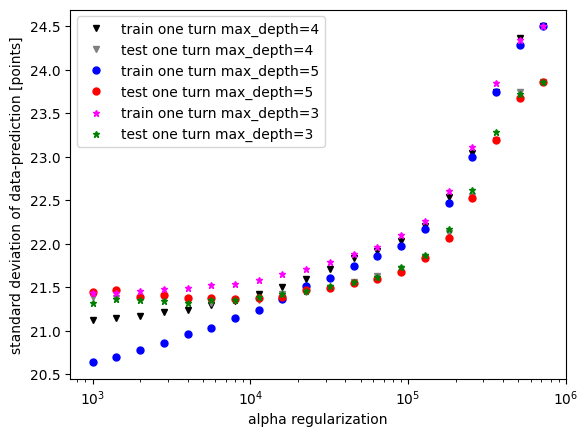

In [26]:
plt.plot(resb[0],resb[2],'v',ms=5,color='black',label='train one turn max_depth=4') 
plt.plot(resb[0],resb[3],'v',ms=5,color='gray',label='test one turn max_depth=4')
plt.plot(resc[0],resc[2],'o',ms=5,color='blue',label='train one turn max_depth=5') 
plt.plot(resc[0],resc[3],'o',ms=5,color='red',label='test one turn max_depth=5')
plt.plot(resa[0],resa[2],'*',ms=5,color='magenta',label='train one turn max_depth=3') 
plt.plot(resa[0],resa[3],'*',ms=5,color='green',label='test one turn max_depth=3')
plt.legend(loc="best")
plt.xscale("log")
#plt.ylim(55,65)
plt.xlabel("alpha regularization")
plt.ylabel("standard deviation of data-prediction [points]")
print(f"The regularization of the best standard deviation is {resa[0,np.argmin(resa[3])]}")
#means in principle more lower should be added ? but also random effects matter 

In [27]:

#excute best model
regxl28=XGBRegressor(max_depth=3,reg_alpha=1000).fit(feature_train, target_train)
#and save it
regxl28.save_model("xgb_model3.json")



A smaller depth seems here better. That is not so suprsing since less data is used for training.
It is doubtful that it perform better thus. 

Other options should be explored. Deep learning seem natural, the fact that features are a combination of values and markers could make problems means it is only regression but also classification. Still, likely other models should be explored also.

Another options is extracting paramters for xgboost, natural is largest value of cards, average value, number of open, closed cards instead of the 12 card values, that are then 14 features. 